In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("106.csv")
df2 = pd.read_csv("160.csv")
df3 = pd.read_csv("319.csv")
df4 = pd.read_csv("159.csv")
df5 = pd.read_csv("263.csv")
df6 = pd.read_csv("700.csv")
df7 = pd.read_csv("219.csv")
df8 = pd.read_csv("122.csv")

In [3]:
df6['label'] = '1'
df7['label'] = '1'
df8['label'] = '1'
DF1 = pd.concat([df6, df7, df8], ignore_index=True)

In [4]:
df1['label'] = '0'
df2['label'] = '0'
df3['label'] = '0'
df4['label'] = '0'
df5['label'] = '0'
DF2 = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_dataframe(df, titre='Analyse des Données'):
    """
    Analyse un DataFrame Pandas et affiche un résumé statistique.

    Paramètres :
    - df : DataFrame Pandas à analyser.
    - titre : Titre de l'analyse (facultatif).

    Retourne :
    - Aucun (affiche un résumé de l'analyse).
    """
    # Affiche le titre de l'analyse
    print(f"\n{titre} :")
    print("===================================")

    # Affiche la longueur du DataFrame (nombre de lignes)
    print(f"Nombre de lignes : {len(df)}")

    # Affiche les noms des colonnes du DataFrame
    print(f"Colonnes : {df.columns.tolist()}\n")

    # Affiche des statistiques descriptives pour les colonnes numériques
    print("Statistiques descriptives :")
    print(df.describe())

def plot_dataframe(df, colonne_label, titre='Distribution des Labels'):
    """
    Trace un graphique de la distribution des labels d'une colonne d'un DataFrame.

    Paramètres :
    - df : DataFrame Pandas à analyser.
    - colonne_label : Nom de la colonne pour laquelle afficher la distribution des labels.
    - titre : Titre du graphique (facultatif).

    Retourne :
    - Aucun (affiche le graphique).
    """
    # Affiche le titre du graphique
    print(f"\n{titre} :")
    print("===================================")

    # Compte la fréquence de chaque valeur unique dans la colonne spécifiée
    # et trace un graphique en barres
    df[colonne_label].value_counts().plot(kind='bar')

    # Ajoute un titre et des étiquettes aux axes du graphique
    plt.title('Distribution des Labels')  # Titre du graphique
    plt.xlabel('Label')  # Étiquette de l'axe des abscisses
    plt.ylabel('Nombre')  # Étiquette de l'axe des ordonnées
    plt.xticks(rotation=0)  # Empêche la rotation des étiquettes des abscisses
    plt.show()  # Affiche le graphique


In [6]:
DF = pd.concat([DF1,DF2],ignore_index=True)

In [7]:
DF

,text,label
0,"Clean and quiet hotel, we booked bed and break...",1
1,On checking in our luggage- it failed to arri...,1
2,"Excellent staff, always smiling and friendly. ...",1
3,"Great bed and rooms, renovated. Beach as well ...",1
4,"Stayed for five nights, following a long weeke...",1
...,...,...
2041,We stayed at this glorified youth hostel this ...,0
2042,My self and my travelling companion Seamus boo...,0
2043,The staff was ok till some problems appeared.....,0
2044,came back on the 13th july... hotel very expen...,0



DataFrame :
Nombre de lignes : 2046
Colonnes : ['text', 'label']

Statistiques descriptives :
                                                     text label
count                                                2046  2046
unique                                               2046     2
top     Clean and quiet hotel, we booked bed and break...     1
freq                                                    1  1039

DataFrame :


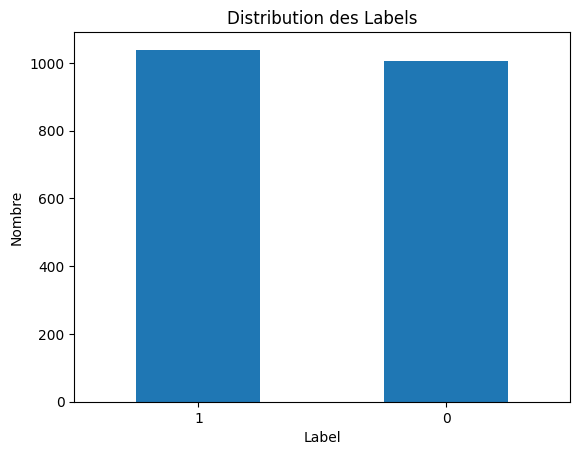

In [8]:
analyze_dataframe(DF, titre='DataFrame')
plot_dataframe(DF,'label', titre='DataFrame')

In [9]:
import string
#convertir la colonne texte en miniscule
DF['text'] = DF['text'].str.lower()

In [10]:

import re
import string
# import emoji

# Création des expressions régulières pour le nettoyage
regex_punctuation = re.compile('[%s]' % re.escape(string.punctuation))
regex_symbols = re.compile(r'\b(?:£|mad|usd|eur|cad|inr|th|m|km|g|kg|cm|mm)\b', re.IGNORECASE)
regex_numbers = re.compile(r'\b\d+(\.\d+)?\b')
regex_mixed = re.compile(r'\b\d+[a-zA-Z]+\b|\b[a-zA-Z]+\d+\b')

def advanced_clean_text(text):
    """
    Nettoie une chaîne de texte en supprimant la ponctuation, les nombres purs,
    les mélanges lettres/chiffres, les unités spécifiques, et les doublons.
    """

    # Supprimer la ponctuation
    text = regex_punctuation.sub(' ', text)

    # Supprimer les nombres purs et les nombres décimaux
    text = regex_numbers.sub('', text)

    # Supprimer les mélanges lettres/chiffres
    text = regex_mixed.sub('', text)

    # Supprimer les symboles spécifiques
    text = regex_symbols.sub('', text)

    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()

    # Supprimer les expressions telles que "13th" et "£1.50"
    text = re.sub(r'\b\d+[a-zA-Z]+\b', '', text)
    text = re.sub(r'\b[a-zA-Z]+\d+\b', '', text)

    return text

# Appliquer la fonction de nettoyage sur la colonne 'text'
DF['cleaned_text'] = DF['text'].apply(advanced_clean_text)

# Afficher les résultats pour vérifier
print("Avant nettoyage :")
print(DF['text'].head())

print("\nAprès nettoyage :")
print(DF['cleaned_text'].head())

Avant nettoyage :
0    clean and quiet hotel, we booked bed and break...
1    on checking in our luggage- it  failed to arri...
2    excellent staff, always smiling and friendly. ...
3    great bed and rooms, renovated. beach as well ...
4    stayed for five nights, following a long weeke...
Name: text, dtype: object

Après nettoyage :
0    clean and quiet hotel we booked bed and breakf...
1    on checking in our luggage it failed to arrive...
2    excellent staff always smiling and friendly ou...
3    great bed and rooms renovated beach as well be...
4    stayed for five nights following a long weeken...
Name: cleaned_text, dtype: object


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
print(", ".join(english_stopwords))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.corpus import stopwords
# Télécharger les stopwords si ce n'est pas encore fait
nltk.download('stopwords')

# Fonction pour supprimer les stopwords d'un texte brut
def remove_stopwords_from_text(text):
    """
    Supprime les stopwords d'une chaîne de texte.
    """
    stop_words = set(stopwords.words('english'))  # Liste des stopwords en anglais
    # Diviser le texte en mots
    words = text.split()
    # Supprimer les stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Reconstruire le texte sans les stopwords
    cleaned_text = ' '.join(filtered_words)
    return cleaned_text

# Appliquer la suppression des stopwords directement sur la colonne 'text'
DF['text_no_stopwords'] = DF['text'].apply(remove_stopwords_from_text)

# Afficher les 5 premières lignes pour vérifier le résultat
print("Avant suppression des stopwords :")
print(DF['text'].head())

print("\nAprès suppression des stopwords :")
print(DF['text_no_stopwords'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Avant suppression des stopwords :
0    clean and quiet hotel, we booked bed and break...
1    on checking in our luggage- it  failed to arri...
2    excellent staff, always smiling and friendly. ...
3    great bed and rooms, renovated. beach as well ...
4    stayed for five nights, following a long weeke...
Name: text, dtype: object

Après suppression des stopwords :
0    clean quiet hotel, booked bed breakfast breakf...
1    checking luggage- failed arrive hour went coll...
2    excellent staff, always smiling friendly. outs...
3    great bed rooms, renovated. beach well beatifu...
4    stayed five nights, following long weekend bre...
Name: text_no_stopwords, dtype: object


In [13]:
from nltk.stem import PorterStemmer  # Pour le stemming
from nltk.stem import WordNetLemmatizer  # Pour la lemmatisation
import re

# Télécharger les ressources nécessaires pour la lemmatisation
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialisation des objets PorterStemmer et WordNetLemmatizer
porter = PorterStemmer()
wordnet = WordNetLemmatizer()

# Fonction pour appliquer la lemmatisation et le stemming sur une chaîne de texte
def lemmatize_and_stem_text(text):
    """
    Applique la lemmatisation et le stemming sur une chaîne de texte complète.

    - text : Chaîne de texte brut
    - Retourne : Chaîne de texte après lemmatisation et stemming
    """
    # Diviser le texte en mots
    words = text.split()

    # Appliquer la lemmatisation
    lemmatized_words = [wordnet.lemmatize(word) for word in words]

    # Appliquer le stemming après la lemmatisation
    stemmed_words = [porter.stem(word) for word in lemmatized_words]

    # Reconstruire la chaîne de texte après traitement
    cleaned_text = ' '.join(stemmed_words)
    return cleaned_text

# Appliquer la fonction sur la colonne de texte brut (sans tokenisation préalable)
DF['clean_text'] = DF['text_no_stopwords'].apply(lemmatize_and_stem_text)

# Afficher les résultats pour vérifier
print("Avant lemmatisation et stemming :")
print(DF['text_no_stopwords'].head())

print("\nAprès lemmatisation et stemming :")
print(DF['clean_text'].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Avant lemmatisation et stemming :
0    clean quiet hotel, booked bed breakfast breakf...
1    checking luggage- failed arrive hour went coll...
2    excellent staff, always smiling friendly. outs...
3    great bed rooms, renovated. beach well beatifu...
4    stayed five nights, following long weekend bre...
Name: text_no_stopwords, dtype: object

Après lemmatisation et stemming :
0    clean quiet hotel, book bed breakfast breakfas...
1    check luggage- fail arriv hour went collect it...
2    excel staff, alway smile friendly. outstand ho...
3    great bed rooms, renovated. beach well beati p...
4    stay five nights, follow long weekend break ma...
Name: clean_text, dtype: object


In [14]:
# Exporter le DataFrame formaté dans un fichier CSV
DF[['text', 'label', 'clean_text']].to_csv('output.csv', index=False)
print("Le tableau a été exporté dans le fichier 'output.csv'.")

Le tableau a été exporté dans le fichier 'output.csv'.


In [15]:
# Afficher les colonnes dans un tableau propre
DF = DF[['text', 'label','clean_text']]
DF

,text,label,clean_text
0,"clean and quiet hotel, we booked bed and break...",1,"clean quiet hotel, book bed breakfast breakfas..."
1,on checking in our luggage- it failed to arri...,1,check luggage- fail arriv hour went collect it...
2,"excellent staff, always smiling and friendly. ...",1,"excel staff, alway smile friendly. outstand ho..."
3,"great bed and rooms, renovated. beach as well ...",1,"great bed rooms, renovated. beach well beati p..."
4,"stayed for five nights, following a long weeke...",1,"stay five nights, follow long weekend break ma..."
...,...,...,...
2041,we stayed at this glorified youth hostel this ...,0,stay glorifi youth hostel month supposedli 2 w...
2042,my self and my travelling companion seamus boo...,0,self travel companion seamu book 2 week holida...
2043,the staff was ok till some problems appeared.....,0,staff ok till problem appeared... day came bac...
2044,came back on the 13th july... hotel very expen...,0,came back 13th july... hotel expens £1.50 coke...



Final DataFrame :
Nombre de lignes : 2046
Colonnes : ['text', 'label', 'clean_text']

Statistiques descriptives :
                                                     text label  \
count                                                2046  2046   
unique                                               2046     2   
top     clean and quiet hotel, we booked bed and break...     1   
freq                                                    1  1039   

                                               clean_text  
count                                                2046  
unique                                               2046  
top     clean quiet hotel, book bed breakfast breakfas...  
freq                                                    1  

Final DataFrame :


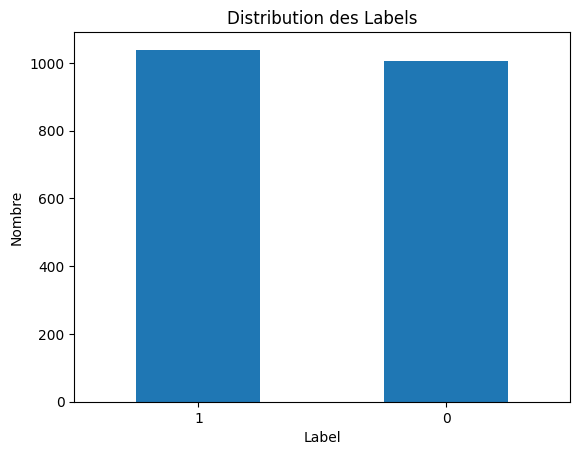

In [16]:
analyze_dataframe(DF, titre='Final DataFrame')
plot_dataframe(DF, 'label', titre='Final DataFrame')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(DF["clean_text"], DF["label"], test_size=0.3, random_state=42, stratify=DF['label'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
pip install xgboost==1.7.5

In [19]:
pip install scikit-learn==1.2.2

In [20]:
import sklearn
import xgboost
print(sklearn.__version__)
print(xgboost.__version__)

1.2.2
1.7.5


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Encode the target variable y to numeric labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

naive_bayes_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB())
])

LogisticRegression_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', LogisticRegression())
])

XGBoost_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', XGBClassifier())
])

svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', SVC())
])


pipelines = {
    'Naive Bayes': naive_bayes_pipeline,
    'Logistic Regression': LogisticRegression_pipeline,
    'XGBoost': XGBoost_pipeline,
    'SVM' :svm_pipeline
}

Hyperparametre_model = {
    'Naive Bayes': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vectorizer__max_df': [0.8, 0.9],
        'model__alpha': [0.1, 0.5],
        'model__fit_prior': [True, False]
    },
    'Logistic Regression': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vectorizer__max_df': [0.8, 0.9],
        'model__C': [0.1, 1.0],
        'model__penalty': ['l2']
    },
    'XGBoost': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vectorizer__max_df': [0.8, 0.9],
        'model__n_estimators': [50, 100],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.1, 0.2]
    },
    'SVM': {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vectorizer__max_df': [0.8, 0.9],
        'model__C': [0.1, 1.0],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto']
    }
}

for nom_model in pipelines.keys():
    # Initialize GridSearchCV()
    grid_search = GridSearchCV(pipelines[nom_model], Hyperparametre_model[nom_model], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)
    print(f"\nMeilleurs hyperparamètres pour {nom_model} : {best_params}")
    print(f"Précision sur l'ensemble de validation ({nom_model}) : {accuracy}")
    print(f"Rapport de classification sur validation ({nom_model}) :\n{report}")


    y_test_predict = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    test_report = classification_report(y_test, y_test_predict)
    print(f"\nPrécision finale sur l'ensemble de test ({nom_model}) : {test_accuracy}")
    print(f"Rapport de classification sur test ({nom_model}) :\n{test_report}")



Meilleurs hyperparamètres pour Naive Bayes : {'model__alpha': 0.1, 'model__fit_prior': False, 'vectorizer__max_df': 0.8, 'vectorizer__ngram_range': (1, 2)}
Précision sur l'ensemble de validation (Naive Bayes) : 0.9739413680781759
Rapport de classification sur validation (Naive Bayes) :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       152
           1       0.99      0.95      0.97       155

    accuracy                           0.97       307
   macro avg       0.97      0.97      0.97       307
weighted avg       0.97      0.97      0.97       307


Précision finale sur l'ensemble de test (Naive Bayes) : 0.9576547231270358
Rapport de classification sur test (Naive Bayes) :
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       150
           1       0.97      0.94      0.96       157

    accuracy                           0.96       307
   macro avg       0.96      0.96      0

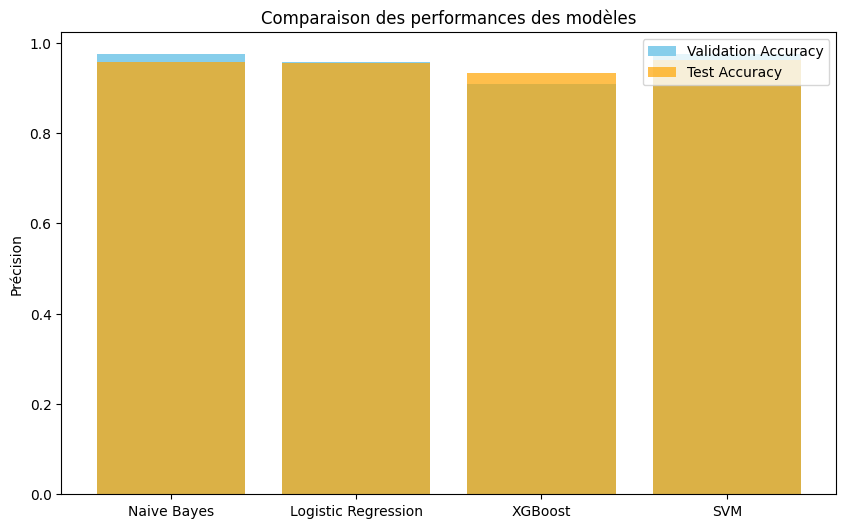

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Initialisation des listes pour stocker les performances
model_names = []
validation_accuracies = []
test_accuracies = []

for model_name in pipelines.keys():
    grid_search = GridSearchCV(pipelines[model_name], Hyperparametre_model[model_name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)

    # Calcul des métriques de validation et de test
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    model_names.append(model_name)
    validation_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Comparer les scores sur un graphique
plt.figure(figsize=(10, 6))
plt.bar(model_names, validation_accuracies, color='skyblue', label='Validation Accuracy')
plt.bar(model_names, test_accuracies, color='orange', label='Test Accuracy', alpha=0.7)
plt.title("Comparaison des performances des modèles")
plt.ylabel("Précision")
plt.legend()
plt.show()

In [23]:
pip install tensorflow

In [24]:
pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# Tokenisation et séquences
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding des séquences
max_sequence_length = 10
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Définir les configurations hyperparamétriques
hyperparameter_model = [
    {'embedding_dim': 50, 'dropout_rate': 0.2, 'recurrent_units': 64, 'num_layers': 1, 'optimizer': 'adam', 'architecture': 'LSTM'},
    {'embedding_dim': 100, 'dropout_rate': 0.3, 'recurrent_units': 128, 'num_layers': 2, 'optimizer': 'adam', 'architecture': 'GRU'},
    {'embedding_dim': 200, 'dropout_rate': 0.4, 'recurrent_units': 256, 'num_layers': 3, 'optimizer': 'rmsprop', 'architecture': 'LSTM'},
]

# Simulation manuelle
for params in hyperparameter_model:
    print(f"\nTesting model with parameters: {params}")

    # Construction du modèle
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=params['embedding_dim'], input_length=max_sequence_length))

    # Ajouter les couches récurrentes
    for i in range(params['num_layers']):
        if params['architecture'] == 'LSTM':
            if i == params['num_layers'] - 1:  # Dernière couche
                model.add(LSTM(params['recurrent_units'], activation='relu', return_sequences=False))
            else:
                model.add(LSTM(params['recurrent_units'], activation='relu', return_sequences=True))
        elif params['architecture'] == 'GRU':
            if i == params['num_layers'] - 1:  # Dernière couche
                model.add(GRU(params['recurrent_units'], activation='relu', return_sequences=False))
            else:
                model.add(GRU(params['recurrent_units'], activation='relu', return_sequences=True))
        elif params['architecture'] == 'SimpleRNN':
            if i == params['num_layers'] - 1:  # Dernière couche
                model.add(SimpleRNN(params['recurrent_units'], activation='relu', return_sequences=False))
            else:
                model.add(SimpleRNN(params['recurrent_units'], activation='relu', return_sequences=True))

    # Ajouter Dropout et couche de sortie
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))

    # Compilation du modèle
    model.compile(optimizer=params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

    # Entraînement
    model.fit(X_train_padded, np.array(y_train), epochs=5, batch_size=32, validation_data=(X_val_padded, np.array(y_val)))

    # Évaluation sur l'ensemble de validation
    y_val_pred = (model.predict(X_val_padded) > 0.5).astype(int)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_report = classification_report(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Validation Classification Report:\n{val_report}")

    # Évaluation sur l'ensemble de test
    y_test_pred = (model.predict(X_test_padded) > 0.5).astype(int)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Classification Report:\n{test_report}")


Testing model with parameters: {'embedding_dim': 50, 'dropout_rate': 0.2, 'recurrent_units': 64, 'num_layers': 1, 'optimizer': 'adam', 'architecture': 'LSTM'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5348 - loss: 0.6907 - val_accuracy: 0.5831 - val_loss: 0.6707
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7192 - loss: 0.5872 - val_accuracy: 0.7980 - val_loss: 0.4571
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8772 - loss: 0.3323 - val_accuracy: 0.8274 - val_loss: 0.4451
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9159 - loss: 0.2462 - val_accuracy: 0.8013 - val_loss: 0.5204
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9208 - loss: 0.1987 - val_accuracy: 0.7915 - val_loss: 0.7096
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
Validation Accuracy: 0.7915309446254072
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.79       152
           1       0.81      0.77      0.79       155

    accuracy                           0.79       307
   macro avg       0.79      0.79    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.5391 - loss: 0.6899 - val_accuracy: 0.7134 - val_loss: 0.6215
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8139 - loss: 0.4725 - val_accuracy: 0.7850 - val_loss: 0.4429
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8954 - loss: 0.2630 - val_accuracy: 0.7915 - val_loss: 0.4947
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9208 - loss: 0.2071 - val_accuracy: 0.8046 - val_loss: 0.5039
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9526 - loss: 0.1437 - val_accuracy: 0.7980 - val_loss: 0.6024
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Validation Accuracy: 0.7980456026058632
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       152
           1       0.81      0.78      0.80       155

    accuracy                           0.80       307
   macro avg       0.80      0.80      0.80     

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.5141 - loss: 0.6934 - val_accuracy: 0.5049 - val_loss: 0.6930
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.5049 - val_loss: 0.6929
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.5176 - loss: 0.6929 - val_accuracy: 0.5049 - val_loss: 0.6926
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.5167 - loss: 0.6923 - val_accuracy: 0.5407 - val_loss: 0.6906
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.5816 - loss: 0.6871 - val_accuracy: 0.7524 - val_loss: 0.6045
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Validation Accuracy: 0.752442996742671
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       152
           1       0.71      0.85      0.78       155

    accuracy                           0.75       307
   macro avg       0.76      0.75      0.75

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Convert numpy arrays to pandas Series
y_train_series = pd.Series(y_train)
y_val_series = pd.Series(y_val)
y_test_series = pd.Series(y_test)

# Concatenate the labels into a single Series
y_full = pd.concat([y_train_series, y_val_series, y_test_series], axis=0)

# Concatenate the text data into a single Series
X_full = pd.concat([X_train, X_val, X_test], axis=0)

# Define the final Naive Bayes pipeline
final_nb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2), max_df=0.8)),
    ('model', MultinomialNB(alpha=0.5, fit_prior=False))
])

# Fit the pipeline on the full dataset
final_nb_pipeline.fit(X_full, y_full)

# Predict on the test set
y_test_pred_final = final_nb_pipeline.predict(X_test)

# Evaluate the final model
accuracy_test_final = accuracy_score(y_test, y_test_pred_final)
report_test_final = classification_report(y_test, y_test_pred_final)

print("Final Test Accuracy: ", accuracy_test_final)
print("Final Test Classification Report:\n", report_test_final)

Final Test Accuracy:  0.990228013029316
Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       150
           1       0.99      0.99      0.99       157

    accuracy                           0.99       307
   macro avg       0.99      0.99      0.99       307
weighted avg       0.99      0.99      0.99       307



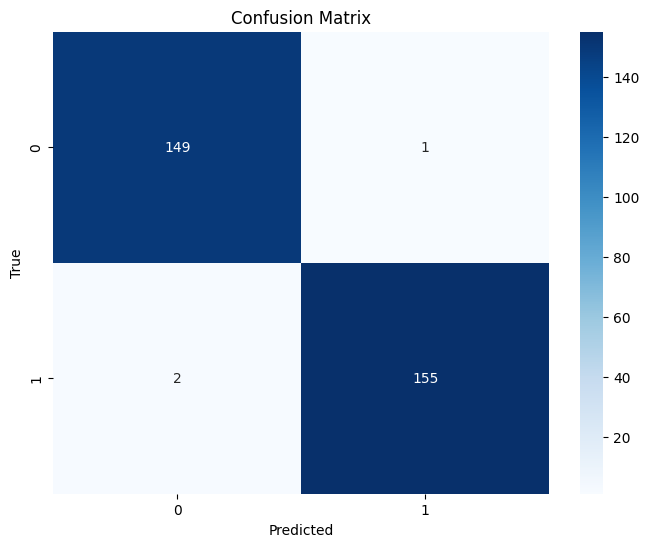

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred_final)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [28]:
# Save the trained model to a file
joblib.dump(final_nb_pipeline, 'final_nb_pipeline.joblib')

['final_nb_pipeline.joblib']

In [29]:
from joblib import load

loaded_model = load('final_nb_pipeline.joblib')

In [30]:
# Example new data
hotel_reviews = [
    "The hotel was amazing! The staff was friendly and the room was spotless.",
    "Terrible experience. The room was dirty and the staff was unhelpful.",
    "The hotel is okay, but the location is not great.",
    "I loved the spa and the breakfast was delicious!",
    "The hotel was overpriced for the quality of the room."
]
# Predict the labels for the new data
new_predictions = loaded_model.predict(hotel_reviews)

# Print the predictions
for reviews, label in zip(hotel_reviews, new_predictions):
    print(f"reviwe: {reviews} -> Predicted Label: {label}")

reviwe: The hotel was amazing! The staff was friendly and the room was spotless. -> Predicted Label: 1
reviwe: Terrible experience. The room was dirty and the staff was unhelpful. -> Predicted Label: 0
reviwe: The hotel is okay, but the location is not great. -> Predicted Label: 0
reviwe: I loved the spa and the breakfast was delicious! -> Predicted Label: 1
reviwe: The hotel was overpriced for the quality of the room. -> Predicted Label: 0
